In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

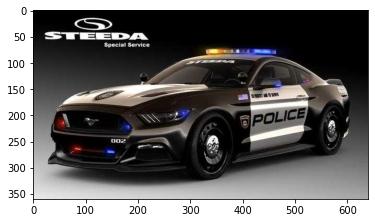

In [2]:
Data_dir = "C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train"

categories = ["Police", "Normal"]
 
for category in categories:
    path = os.path.join(Data_dir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.COLOR_BGR2RGB)
        plt.imshow(img_array, cmap = "gray")
        plt.show()
        break
    break
    

In [3]:
training_data = []
img_size = 224

def create_train_data():
    for category in categories:
        path = os.path.join(Data_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.COLOR_BGR2RGB)
                new_array  = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exceptirn as e:
                pass
    
create_train_data()

In [4]:
import random

random.shuffle(training_data)

In [5]:
X = []
y = []

In [6]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [7]:
y = np.array(y)
X_resized = []
for image in X:
    resized_image = cv2.resize(image, (224, 224))
    X_resized.append(resized_image)

X = np.array(X_resized)

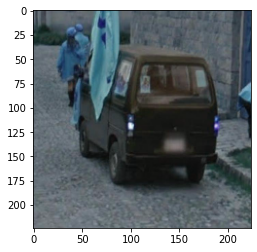

In [8]:
plt.imshow(X[4])

In [9]:
y.shape

(1899,)

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [11]:
X1=[]
for i in X:
    i=i/255.0
    X1.append(i)
    
X1 = np.array(X1)

In [12]:


model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(
            loss="binary_crossentropy",
            optimizer=Adam(learning_rate=0.0001),
            metrics=["accuracy"])


In [13]:
#model.fit(X, y, batch_size = 32, validation_split=0.1, epochs=10)

In [14]:
from sklearn.model_selection import train_test_split

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X1, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [15]:
import time

start_time = time.time()

print("Train set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

history = model.fit(X_train, y_train, batch_size=32, validation_data=(X_val, y_val), epochs=10)


test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")

end_time = time.time()

elapsed_time = end_time - start_time

print(f"Execution time: {elapsed_time} seconds")

Train set: (1519, 224, 224, 3) (1519,)
Validation set: (190, 224, 224, 3) (190,)
Test set: (190, 224, 224, 3) (190,)
Epoch 1/10
48/48 [==============================] - 78s 2s/step - loss: 0.5506 - accuracy: 0.7406 - val_loss: 0.3946 - val_accuracy: 0.8632
Epoch 2/10
48/48 [==============================] - 73s 2s/step - loss: 0.3757 - accuracy: 0.8545 - val_loss: 0.4938 - val_accuracy: 0.7684
Epoch 3/10
48/48 [==============================] - 73s 2s/step - loss: 0.3277 - accuracy: 0.8677 - val_loss: 0.2871 - val_accuracy: 0.8842
Epoch 4/10
48/48 [==============================] - 73s 2s/step - loss: 0.2544 - accuracy: 0.9052 - val_loss: 0.2567 - val_accuracy: 0.8842
Epoch 5/10
48/48 [==============================] - 74s 2s/step - loss: 0.2072 - accuracy: 0.9256 - val_loss: 0.2269 - val_accuracy: 0.9053
Epoch 6/10
48/48 [==============================] - 75s 2s/step - loss: 0.1560 - accuracy: 0.9473 - val_loss: 0.1960 - val_accuracy: 0.9263
Epoch 7/10
48/48 [=========================

In [16]:
print(y_train)

[1 0 1 ... 1 1 1]


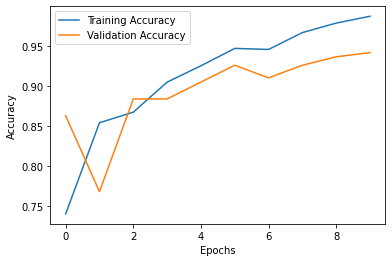

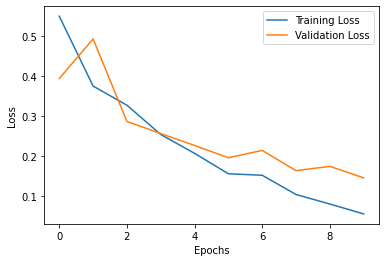

6/6 [==============================] - 2s 405ms/step - loss: 0.1854 - accuracy: 0.9421
Test Accuracy: 94.21%


In [17]:
# Plotting accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


In [18]:
model.save('police_car_detection.h5')

C:\Users\ragha\Anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:

def prepare(filepath):
    img_size = 224
    img_array =cv2.imread(filepath, cv2.COLOR_BGR2RGB)
    new_array  = cv2.resize(img_array, (img_size, img_size))
    new_array = np.array(new_array).reshape(-1, img_size, img_size, 3)
    #new_array=new_array/255.0
    return new_array

In [20]:
#model = tf.keras.models.load_model('police_car_detection.h5')

In [26]:
prediction = model.predict([prepare("tes2.jpg")])
print(categories[int(prediction[0][0])])

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [35]:
prediction = model.predict(prepare("test5.jpg"))
print(categories[int(prediction)])

1/1 [==============================] - 0s 33ms/step
Police


C:\Users\ragha\AppData\Local\Temp\ipykernel_16932\1564612582.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(categories[int(prediction)])


In [23]:
print(prediction)

[[1.]]
